In [ ]:
import torch
import torch.nn as nn

# nn.Linear
 -  (a,b) -> 행렬 곱 수행.
  weight, bias 는 uniform distribution에서 샘플링되거나, torch의 경우에는 Xavier 초기화를 참고함

In [ ]:
fc = nn.Linear(3,5)
print(fc)
print(fc.weight)

Linear(in_features=3, out_features=5, bias=True)
Parameter containing:
tensor([[ 0.2265, -0.5087,  0.1516],
        [-0.2841, -0.2886, -0.0654],
        [ 0.2137, -0.2246, -0.1713],
        [-0.3726, -0.5065, -0.2838],
        [-0.5637, -0.1374,  0.1408]], requires_grad=True)


In [ ]:
a = torch.tensor([1.0, 2.0, 3.0])

result = fc(a) # 이렇게 함수처럼 쓰면 됨
print(result)

tensor([-0.3329, -0.8369, -0.9250, -2.7011, -0.3933], grad_fn=<ViewBackward0>)


 특징
  - bias = False로 생략 가능
  - 굳이 axb 행렬이 들어오지 않아도 됨. dimension은 추가될 수 있음.
    - 그러나 마지막 사이즈는 같아야함 !!
    - 3x4x5 & nn.linear(5x3) => 3x4x3

# nn.Flatten
  - 첫 요소는 배치사이즈니까 제외하고, 나버지 부분을 1차원으로 평탄화


In [ ]:
a = torch.randn(4,1,5,5) # 여기서 4는 배치사이즈
a.shape

torch.Size([4, 1, 5, 5])

In [ ]:
flat = nn.Flatten()
result = flat(a)
result.shape

torch.Size([4, 25])

# (tensor).view
- a.view 내부에 들어가는 a.size(0) 이거 대로 1번째에 넣고, 나머지 처리.
  - 즉 a.size(1)이면, 1번째에 있던 요소 사이즈를 기반으로 나머지 처리

In [ ]:
a.shape

torch.Size([4, 1, 5, 5])

In [ ]:
flat = a.view(a.size(0),-1)
flat.shape

torch.Size([4, 25])

In [ ]:
flat = a.view(a.size(1),-1)
flat.shape

torch.Size([1, 100])

주의할 점
- 처음 nn.Flatten() 여기는 초기화 부분이므로, 여기다가 직접 (a)를 넣으면 안됨

# (tensor).reshape
- view랑 거의 동일
  - view는 데이터 구조를 변경하지 않고 크기만 바꾸는 반면,
  - reshape는 텐서가 연속적이지 않아도 사용 가능하며, 필요시 내부 메모리를 복사해 새로운 텐서를 만든다는 차이점 존재
  

In [ ]:
a.shape

torch.Size([4, 1, 5, 5])

In [ ]:
a.reshape(a.size(0),-1).shape

torch.Size([4, 25])

In [ ]:
a = torch.randn(2,4,3,4)
print(a.shape)

b = a.view(2,4,-1) # 이렇게하면 자동병합

b.shape

torch.Size([2, 4, 3, 4])


torch.Size([2, 4, 12])

In [ ]:
import torch

# 임의의 입력 텐서 생성 (batch_size=2, token=4, embedding_dim=12)
batch_size = 2
num_tokens = 4
embedding_dim = 12
num_heads = 3
head_dim = embedding_dim // num_heads  # head별 embedding 크기

x = torch.randn(batch_size, num_tokens, embedding_dim)  # (2, 4, 12)

# ✅ 첫 번째 코드: view()만 사용
K1 = x.view(batch_size, num_heads, num_tokens, head_dim)  # (2, 3, 4, 4)
print("첫 번째 코드 (view()만 사용):", K1.shape)

# ✅ 두 번째 코드: view() 후 permute() 사용
K2 = x.view(batch_size, num_tokens, num_heads, head_dim).permute(0, 2, 1, 3)  # (2, 3, 4, 4)
print("두 번째 코드 (view() + permute() 사용):", K2.shape)

# ✅ 텐서 값 비교 (첫 번째 코드 vs 두 번째 코드)
print("\nK1 (view()만 사용) 첫 번째 헤드:")
print(K1[:, 0, :, :])  # 첫 번째 head 값 출력

print("\nK2 (view() + permute() 사용) 첫 번째 헤드:")
print(K2[:, 0, :, :])  # 첫 번째 head 값 출력

첫 번째 코드 (view()만 사용): torch.Size([2, 3, 4, 4])
두 번째 코드 (view() + permute() 사용): torch.Size([2, 3, 4, 4])

K1 (view()만 사용) 첫 번째 헤드:
tensor([[[ 0.1771, -0.7170,  0.7666, -0.5292],
         [ 0.6788, -0.6517,  0.7587,  1.2906],
         [-1.3377,  0.0369, -1.9945, -0.0233],
         [ 0.0733,  0.3545, -0.4763, -0.7234]],

        [[ 0.5582, -1.0715, -0.0170,  1.0894],
         [-0.5554, -0.3221,  1.6016, -0.6279],
         [ 0.2784, -0.5123, -1.1387,  0.0803],
         [ 1.2537, -0.0840, -0.7322, -0.5534]]])

K2 (view() + permute() 사용) 첫 번째 헤드:
tensor([[[ 0.1771, -0.7170,  0.7666, -0.5292],
         [ 0.0733,  0.3545, -0.4763, -0.7234],
         [ 0.1721,  0.3009, -0.9971, -1.3275],
         [-0.1684,  1.5674,  0.9103, -0.3157]],

        [[ 0.5582, -1.0715, -0.0170,  1.0894],
         [ 1.2537, -0.0840, -0.7322, -0.5534],
         [-0.6208,  0.2440, -1.9267, -0.0892],
         [ 1.1120,  1.5067,  1.4791,  0.3896]]])


# dataloader 사용하기
- CNN에서, 모델의 입력으로는 batch x channel x H x W 이렇게 들어가야함
- 데이터로더는 단순히 이미지 , 라벨로 묶인 텐서가 아님.
  - 반드시 Dataset 을 상속받아서 CustomDataset을 만들던가, TensorDataset 을 사용해야함

In [ ]:
# 이미지 준비
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

train_file_path = '/content/drive/MyDrive/Kannada-MNIST/train.csv'
test_file_path = '/content/drive/MyDrive/Kannada-MNIST/test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

Mounted at /content/drive


In [ ]:
import torch

train_images = []
train_labels = []

# 각 행에서 데이터를 추출
for idx in range(len(train_data)):
    # 라벨 추출
    label = train_data.iloc[idx,0]
    train_labels.append(label)

    # 픽셀 데이터 추출
    pixels = train_data.iloc[idx,1:].values.reshape((1, 28, 28))
    train_images.append(pixels)


train_images = torch.tensor(train_images, dtype=torch.float32)  # 이미지는 float32 텐서로 변환
train_labels = torch.tensor(train_labels, dtype=torch.long)    # 라벨은 long 텐서로 변환

<ipython-input-3-055904ad5961>:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  train_images = torch.tensor(train_images, dtype=torch.float32)  # 이미지는 float32 텐서로 변환


In [ ]:
# train_set = [train_images,train_labels] << 이런식으로하면 절대안됨 !!!
train_set = torch.utils.data.TensorDataset(train_images, train_labels)

In [ ]:
train_set[0][0].shape

torch.Size([1, 28, 28])

그러고 나서 torch.utils.data.Dataloader 호출

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)

In [ ]:
for input, label in train_loader :
  print(input.shape)
  print(label.shape)
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])


# data Augmentation
- torchvision.transformers 사용
- 다만 위에서 사용한 TensorDataset은 transforms를 지원하지 않으므로, customDataset 클래스 정의 필요함

<< 기본꼴 >>

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

<< 사용자 정의 dataset 클래스 >>

- 이 클래스 내부에는, 반드시 init, len, getitem 필요 !!
- getitem 을 통해서, idx에 맞는 값 x,y 리턴하도록 설계해야함

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self, images, labels, transform) :
    self.images = images
    self.labels = labels
    self.transform = transform

  def __len__(self):
    return len(self.labels)

  def __getitem__(self,idx):
    image = self.images[idx]
    label = self.labels[idx]

    if self.transform :
      image = self.transform(image)

    return image, label


# torch.add
  - 브로드캐스팅 성질 : 차원이 안맞아도, 특정 조건 맞으면 알아서 더해줌
  

In [ ]:
a1 = torch.tensor([[1,2,3,4,5],[2,3,4,5,6],[3,4,5,6,7]])   ## 3*5
a2 = torch.tensor([1,2,3,4,5]) # 5

print(torch.add(a1,a2))

tensor([[ 2,  4,  6,  8, 10],
        [ 3,  5,  7,  9, 11],
        [ 4,  6,  8, 10, 12]])


# torch.cat
  - 이거 순서 중요함. 먼저 오는놈이 앞에서 결합됨. & dim 기준으로 늘어남
  - vit 코드에서... x = torch.cat((self.cls,x),dim=1)

In [ ]:
cls = torch.randn((1,1,4))
x = torch.randn((1,1,4))

torch.cat((cls,x),dim=1).shape

torch.Size([1, 2, 4])

In [ ]:
hola = torch.tensor([1,2,3]).float()

haha = nn.Linear(3,5)

print(haha(hola).shape)

torch.Size([5])


# torch.softmax

- 아래처럼, 마지막 dim으로 하면 1 2 3 4 5 기준으로 softmax

In [ ]:
a1 = torch.tensor([[[1,2,2,4,5],[2,3,4,5,6],[3,4,5,6,7]],[[1,2,3,4,5],[2,3,4,5,6],[3,4,5,6,7]]])   ## 2*3*5
a1 = a1.float()
torch.softmax(a1,dim=-1)

tensor([[[0.0123, 0.0335, 0.0335, 0.2476, 0.6731],
         [0.0117, 0.0317, 0.0861, 0.2341, 0.6364],
         [0.0117, 0.0317, 0.0861, 0.2341, 0.6364]],

        [[0.0117, 0.0317, 0.0861, 0.2341, 0.6364],
         [0.0117, 0.0317, 0.0861, 0.2341, 0.6364],
         [0.0117, 0.0317, 0.0861, 0.2341, 0.6364]]])

# nn.ConvTranspose2d

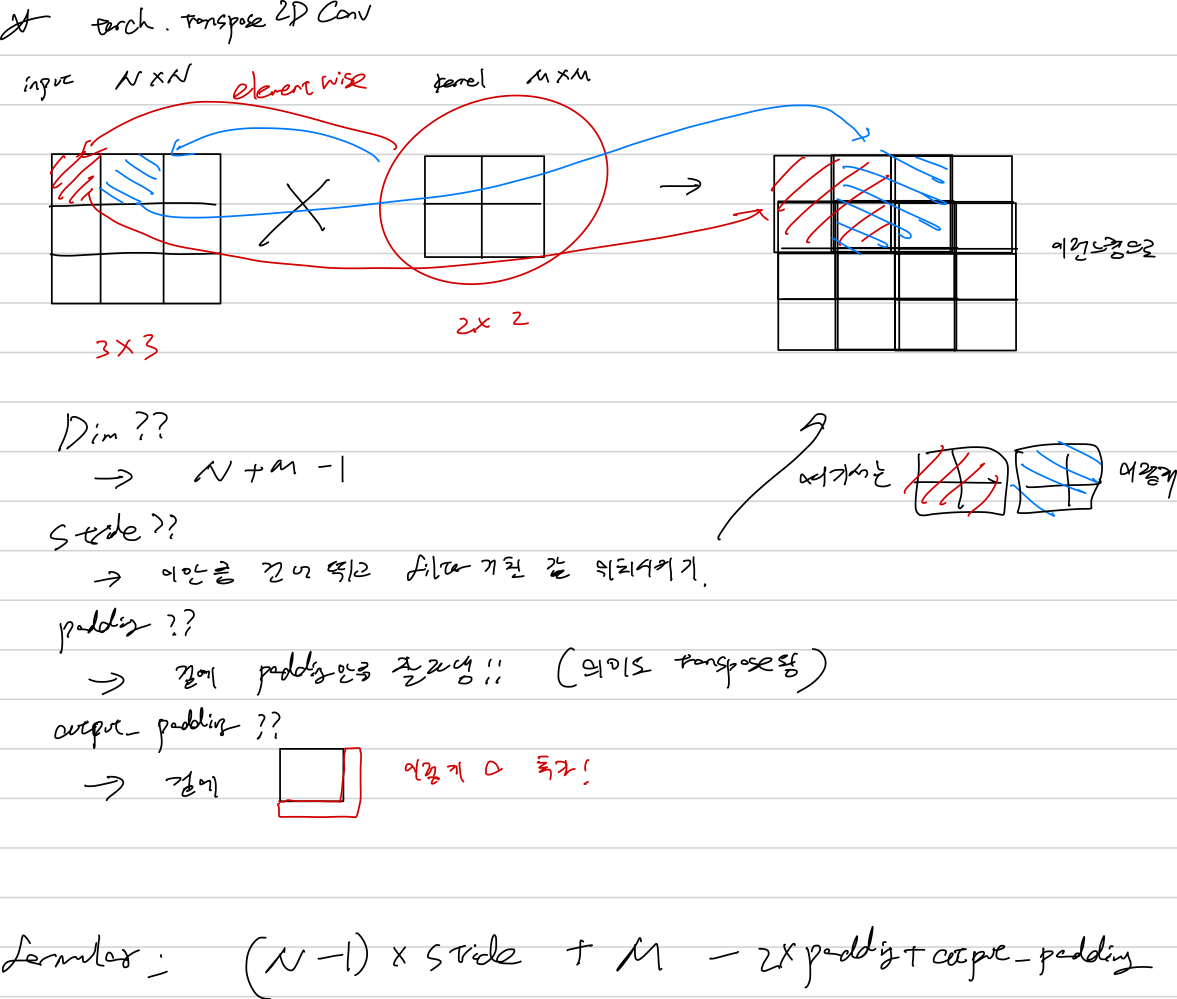

In [ ]:
m1 = torch.tensor([[1,1,1],[1,1,1],[1,1,1]])
m1 = m1.unsqueeze(0)
m1 = m1.float()
filter = nn.ConvTranspose2d(in_channels=1,out_channels=2,kernel_size=2)
print(filter(m1))

tensor([[[ 0.2891,  0.4841,  0.4841,  0.4725],
         [ 0.2292,  0.7616,  0.7616,  0.8098],
         [ 0.2292,  0.7616,  0.7616,  0.8098],
         [ 0.2176,  0.5549,  0.5549,  0.6148]],

        [[-0.1529, -0.4803, -0.4803, -0.1895],
         [-0.0059, -0.1626, -0.1626, -0.0188],
         [-0.0059, -0.1626, -0.1626, -0.0188],
         [ 0.2849,  0.4556,  0.4556,  0.3086]]], grad_fn=<SqueezeBackward1>)


## torch.empty


In [ ]:
k1 = torch.empty(3,5)
k1.shape

torch.Size([3, 5])

## torch.arange
- 이거 저거랑 똑같음 python에서 range랑

In [ ]:
x = torch.arange(5,11,2)
print(x)

tensor([5, 7, 9])


## torch.ones

In [ ]:
a = torch.ones(1,1,3)
a.shape

torch.Size([1, 1, 3])

## upper_triangle -> torch.triu

In [ ]:
upper_triangle = torch.triu(torch.ones(4, 4), diagonal=1)
upper_triangle

tensor([[0., 1., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.]])

## nn.linear

In [ ]:
fc = nn.Linear(10,32)

a1 = torch.randn(3,2,10)

print(fc(a1).shape)

torch.Size([3, 2, 32])


## nn.embedding

In [ ]:
# 단어 사전 크기 (vocab_size=100)
vocab_size = 100
embedding_dim = 32

# 임베딩 레이어 생성
eb = nn.Embedding(vocab_size, embedding_dim)

# 🔥 올바른 입력값 생성 (범위를 `0 ~ vocab_size-1`로 제한)
a1 = torch.randint(0, vocab_size, (3, 30))  # (batch_size=3, seq_len=30)

# 임베딩 변환
output = eb(a1)

print(output.shape)  # torch.Size([3, 30, 32])

torch.Size([3, 30, 32])


In [ ]:
a = torch.full((64, 1), 1)
a.shape

b = torch.randn(64,31)

c = torch.cat((a,b),dim=1)
c.shape

torch.Size([64, 32])